## Final Project Submission

Please fill out:
* Student name: Kosta Tzioumis
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Eli
* Blog post URL:


## Data Set obtained from:
https://www.kaggle.com/cityofLA/los-angeles-metro-bike-share-trip-data

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
df=pd.read_csv('metro-bike-share-trip-data.csv')
df.head(10)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,NaN,NaN,NaN,NaN,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21784648,14760,2017-03-10T17:38:00.000,2017-03-10T21:44:00.000,3065.0,34.060558,-118.238327,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22506739,79020,2017-03-17T19:20:00.000,2017-03-18T17:17:00.000,3063.0,34.049198,-118.252831,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20889067,86400,2017-02-26T12:18:00.000,2017-02-27T12:36:00.000,3062.0,34.047749,-118.243172,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18481915,600,2017-01-23T18:48:00.000,2017-01-23T18:58:00.000,3082.0,34.046520,-118.237411,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df.shape

(132427, 22)

Feature descriptions from https://bikeshare.metro.net/about/data/

<b>trip_id:</b> Locally unique integer that identifies the trip

<b>duration:</b> Length of trip in <i> minutes*</i>

<b>start_time:</b> The date/time when the trip began, presented in ISO 8601 format in local time

<b>end_time: </b>The date/time when the trip ended, presented in ISO 8601 format in local time

<b>start_station:</b> The station ID where the trip originated 

<b>start_lat:</b> The latitude of the station where the trip originated

<b>start_lon: </b>The longitude of the station where the trip originated

<b>end_station: </b>The station ID where the trip terminated 

<b>end_lat: </b>The latitude of the station where the trip terminated

<b>end_lon: </b>The longitude of the station where the trip terminated

<b>bike_id: </b> Locally unique integer that identifies the bike
    
<b>plan_duration: </b>The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)

<b>trip_route_category:</b> "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

<b>passholder_type: </b>The name of the passholder's plan

*units are actually in but each instance is a multiple of 60 i.e. a whole minute number. We will convert this to minutes

Other features are not officially described by Metro Bike Share

Starting Lat-Long and Ending Lat-Long appear to be repetitions of previous station data and can be dropped safely

Remaining features appear to be LA geographic information not relevant to this study, many of which include large amounts of missing data. These will  also be dropped.

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
Trip ID                              132427 non-null int64
Duration                             132427 non-null int64
Start Time                           132427 non-null object
End Time                             132427 non-null object
Starting Station ID                  132408 non-null float64
Starting Station Latitude            132379 non-null float64
Starting Station Longitude           132379 non-null float64
Ending Station ID                    132331 non-null float64
Ending Station Latitude              131376 non-null float64
Ending Station Longitude             131376 non-null float64
Bike ID                              132417 non-null float64
Plan Duration                        131661 non-null float64
Trip Route Category                  132427 non-null object
Passholder Type                      132427 non-null object
Starting Lat-Long                    98622 

In [147]:
df.isna().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                      19
Starting Station Latitude                48
Starting Station Longitude               48
Ending Station ID                        96
Ending Station Latitude                1051
Ending Station Longitude               1051
Bike ID                                  10
Plan Duration                           766
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     33805
Ending Lat-Long                        1051
Neighborhood Councils (Certified)     33837
Council Districts                     33837
Zip Codes                             33837
LA Specific Plans                    116590
Precinct Boundaries                    1099
Census Tracts                          1099
dtype: int64

In [148]:
df.drop(columns=['Starting Lat-Long',
                 'Ending Lat-Long',
                 'Neighborhood Councils (Certified)',
                 'Council Districts',
                 'Zip Codes',
                 'LA Specific Plans',
                 'Precinct Boundaries',
                 'Census Tracts'],
       inplace=True)
df.Duration=df.Duration/60

In [149]:
df.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
0,18222186,251.0,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,5944.0,0.0,One Way,Walk-up
1,9518671,1286.0,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,6603.0,30.0,One Way,Monthly Pass
2,20444932,1440.0,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,5879.0,0.0,One Way,Walk-up
3,20905031,314.0,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,6056.0,0.0,One Way,Walk-up
4,21031476,1440.0,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,6054.0,365.0,One Way,Flex Pass


Trip ID can be used is a unique identifier and can be used as an index for this data.

Remaining features had little missing data the largest source being just 1051 missing cells from over 132,000. Rows with missing data can be safely dropped from the datasets.

Start Time and End Time will be converted to time series data types

In [150]:
df.set_index('Trip ID', inplace=True)
df.dropna(inplace=True)
df['Start Time']= pd.to_datetime(df['Start Time'])
df['End Time']=pd.to_datetime(df['End Time'])
df.head()

,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
Trip ID,,,,,,,,,,,,,
17848847,8.0,2017-01-13 21:32:00,2017-01-13 21:40:00,3082.0,34.046520,-118.237411,3036.0,34.039188,-118.232529,6474.0,0.0,One Way,Walk-up
20700706,9.0,2017-02-24 23:13:00,2017-02-24 23:22:00,3029.0,34.048851,-118.246422,3082.0,34.046520,-118.237411,5794.0,30.0,One Way,Monthly Pass
20595730,14.0,2017-02-23 07:34:00,2017-02-23 07:48:00,3022.0,34.046070,-118.233093,3005.0,34.048550,-118.259048,6604.0,30.0,One Way,Monthly Pass
17307719,7.0,2017-01-05 12:04:00,2017-01-05 12:11:00,3059.0,34.037949,-118.256271,3038.0,34.046822,-118.248352,6035.0,30.0,One Way,Monthly Pass
18941656,14.0,2017-01-30 20:19:00,2017-01-30 20:33:00,3035.0,34.048401,-118.260948,3040.0,34.053570,-118.266357,6728.0,0.0,One Way,Walk-up


Lets inspect the categorical features of Bike ID, Plan Duration, Trip Route Category, Passholder Type

In [151]:
df['Trip Route Category'].value_counts()

One Way       118070
Round Trip     12645
Name: Trip Route Category, dtype: int64

In [152]:
df['Passholder Type'].value_counts()

Monthly Pass    80493
Walk-up         40756
Flex Pass        9466
Name: Passholder Type, dtype: int64

In [153]:
df['Plan Duration'].value_counts()

30.0     80493
0.0      40756
365.0     9466
Name: Plan Duration, dtype: int64

Plan Duration and Passholder Type appear to be displaying the same data in 2 different fashions
30 == Monthly Pass 
0 == Walk-up
365 == Flex Pass
Having this feature exist twice is unnecessary, so lets drop Plan Duration

In [154]:
df.drop(columns=['Plan Duration'],inplace=True)

In [155]:
len(df['Bike ID'].unique())

762

762 individual bikes in the system

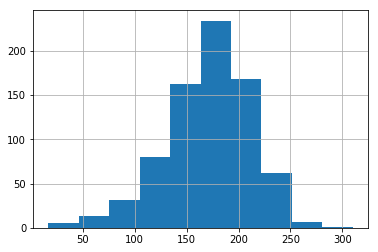

In [156]:
df['Bike ID'].value_counts().hist()

Distribution of Bike usage appears normal indicating the bikes are all used randomly. This is to be expected

In [157]:
df['Bike ID'].value_counts().tail()

5906.0    46
6342.0    41
6050.0    41
6632.0    21
6013.0    17
Name: Bike ID, dtype: int64

In [158]:
df.describe()

,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID
count,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000
mean,22.587155,3042.568756,34.039216,-118.221176,3041.993597,34.034566,-118.206420,6193.698114
std,77.840790,30.970158,0.532694,1.849996,33.546514,0.652348,2.265617,293.303470
min,1.000000,3005.000000,0.000000,-118.472832,3005.000000,0.000000,-118.472832,4727.000000
25%,6.000000,3024.000000,34.044170,-118.256980,3023.000000,34.044159,-118.256981,5953.000000
50%,10.000000,3039.000000,34.046822,-118.250954,3038.000000,34.046810,-118.250954,6186.000000
75%,18.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238810,6434.000000
max,1440.000000,4108.000000,34.064281,0.000000,4108.000000,34.064281,0.000000,6728.000000


Starting Station Latitude, Starting Station Longitude, Ending Station Latitude & Ending Station Longitude contain zeros that must be treated as missing data. 

In [159]:
for feature in ['Starting Station Latitude', 'Starting Station Longitude', 'Ending Station Latitude' , 'Ending Station Longitude']:

    print('For {} there are {} zeros'.format(feature,len(df.loc[df[feature]==0])))

For Starting Station Latitude there are 32 zeros
For Starting Station Longitude there are 32 zeros
For Ending Station Latitude there are 48 zeros
For Ending Station Longitude there are 48 zeros


this is a very small fraction of the data and will be dropped

In [160]:
#replace all zeros with NaN and then apply .dropna() to remove
df['Starting Station Latitude'].replace(0,np.nan,inplace=True)
df['Starting Station Longitude'].replace(0,np.nan,inplace=True)
df['Ending Station Latitude'].replace(0,np.nan,inplace=True)
df['Ending Station Longitude'].replace(0,np.nan,inplace=True)
df.dropna(inplace=True)
df.describe()

,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID
count,130655.000000,130655.000000,130655.000000,130655.000000,130655.000000,130655.000000,130655.000000,130655.000000
mean,22.579779,3042.305170,34.047552,-118.250125,3041.602089,34.047068,-118.249843,6193.705231
std,77.844127,26.103427,0.006350,0.011475,26.611986,0.006265,0.011984,293.325616
min,1.000000,3005.000000,33.987381,-118.472832,3005.000000,33.987381,-118.472832,4727.000000
25%,6.000000,3024.000000,34.044170,-118.256980,3023.000000,34.044159,-118.256981,5953.000000
50%,10.000000,3039.000000,34.046822,-118.250954,3038.000000,34.046810,-118.250954,6186.000000
75%,18.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238810,6434.000000
max,1440.000000,4108.000000,34.064281,-118.231277,4108.000000,34.064281,-118.231277,6728.000000


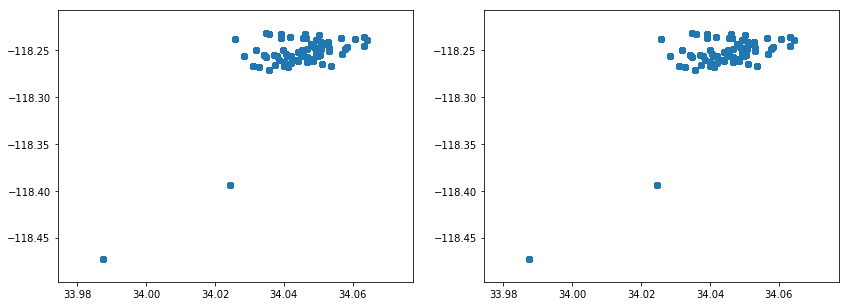

In [161]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(df['Starting Station Latitude'],df['Starting Station Longitude'],alpha=0.3)
plt.subplot(1,2,2)
plt.scatter(df['Ending Station Latitude'],df['Ending Station Longitude'],alpha=0.3)
plt.show()

Matching plots indicate there are no start points that had no drop off and vice-versa this would seem logical

In [162]:
sorted(df['Starting Station ID'].unique())==sorted(df['Ending Station ID'].unique())

True

This confirms that the Starting and Ending Stations sets are identical as expected

HOWEVER, the are more unique Starting Station Latitiudes than there are unique Starting Station IDs!
This is impossible, the stations are not mobile. they are fixed street locations

In [163]:
print('There are {} Station Ids'.format(len(df['Starting Station ID'].unique())))
print('There are {} Station Latitudes'.format(len(df['Starting Station Latitude'].unique())))

There are 66 Station Ids
There are 124 Station Latitudes


Upon closer inspection we can see why

In [164]:
df.loc[df['Starting Station ID']==3063]['Starting Station Latitude'].value_counts()

34.049198    1749
34.049198    1157
Name: Starting Station Latitude, dtype: int64

Numeric float values are the same but possibly rounding errors causing them to show up differently

In [165]:
df['Starting Station Latitude']=round(df['Starting Station Latitude'],5)#round all to 5 decimal places

In [166]:
df.loc[df['Starting Station ID']==3063]['Starting Station Latitude'].value_counts()

34.0492    2906
Name: Starting Station Latitude, dtype: int64

All instances of this Station ID now have the same Latitude

In [167]:
multi_lat=[]
#Check if any Station ID has more than 1 unique Latitude value 
for ID in df['Starting Station ID'].unique():
    a=len(df.loc[df['Starting Station ID']==ID]['Starting Station Latitude'].unique())
    if a>1:
        multi_lat.append(ID)
print(multi_lat)
print('There are now {} Station Latitudes'.format(len(df['Starting Station Latitude'].unique())))

[]
There are now 66 Station Latitudes


The empty list above indicates that no station has more than 1 Latitude value attached to it 
Also dropping a decimal place from our latitude has not made our latitude data imprecise as there is still sufficient detail to identify each Station 

In [168]:
print('There are now {} Station Latitudes'.format(len(df['Starting Station Latitude'].unique())))

There are now 66 Station Latitudes


We can repeat theses steps for Starting Station Longitude, Ending Station Latitude and Ending Station Longitude

In [169]:
df['Starting Station Longitude']=round(df['Starting Station Longitude'],5)
df['Ending Station Latitude']=round(df['Ending Station Latitude'],5)
df['Ending Station Longitude']=round(df['Ending Station Longitude'],5)

In [170]:
multi=[]
#As above but generalized for features
features=['Starting Station Latitude','Starting Station Latitude','Ending Station Latitude','Ending Station Longitude']
for ID in df['Starting Station ID'].unique():
    for feat in features:
        a=len(df.loc[df['Starting Station ID']==ID][feat].unique())
        if a>1:
            multi_lat.append(ID)
            
for feat in features:
    print('There are now {} values of {}'.format(len(df[feat].unique()),feat))
print(multi)


There are now 66 values of Starting Station Latitude
There are now 66 values of Starting Station Latitude
There are now 66 values of Ending Station Latitude
There are now 64 values of Ending Station Longitude
[]


The empty list above indicates that no station has more than 1 Location value attached to it. 
Also, dropping a decimal place from our latitude and longitude has not made our location data imprecise as there is still sufficient detail to identify each Station 

Now would a great time for a map!

In [171]:
import folium
bike_map1=folium.Map([df['Starting Station Latitude'].values[0],df['Starting Station Longitude'].values[0]])
for station in df['Starting Station ID'].unique():
    lat=df.loc[df['Starting Station ID']==station]['Starting Station Latitude'].values[0]
    lon=df.loc[df['Starting Station ID']==station]['Starting Station Longitude'].values[0]
    marker=folium.Marker([lat,lon])
    marker.add_to(bike_map1)

bike_map1

Fixed this example, how many unique values are there now?

In [135]:
df.loc[df.Duration==1]

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
380,18767212,1.0,2017-01-28T10:38:00.000,2017-01-28T10:39:00.000,3075.0,34.042110,-118.256187,3075.0,34.042110,-118.256187,6389.0,0.0,Round Trip,Walk-up
451,21159774,1.0,2017-03-03T01:09:00.000,2017-03-03T01:10:00.000,3031.0,34.044701,-118.252441,3031.0,34.044701,-118.252441,5870.0,365.0,Round Trip,Flex Pass
473,23162233,1.0,2017-03-26T08:30:00.000,2017-03-26T08:31:00.000,3009.0,33.987381,-118.472832,3009.0,33.987381,-118.472832,5807.0,0.0,Round Trip,Walk-up
474,18696322,1.0,2017-01-27T07:37:00.000,2017-01-27T07:38:00.000,3047.0,34.039982,-118.266403,3056.0,34.037460,-118.265381,6348.0,30.0,One Way,Monthly Pass
529,17940873,1.0,2017-01-15T09:38:00.000,2017-01-15T09:39:00.000,3056.0,34.037460,-118.265381,3056.0,34.037460,-118.265381,6158.0,0.0,Round Trip,Walk-up
574,21335872,1.0,2017-03-05T08:33:00.000,2017-03-05T08:34:00.000,3075.0,34.042110,-118.256187,3075.0,34.042110,-118.256187,5987.0,30.0,Round Trip,Monthly Pass
578,21396292,1.0,2017-03-06T02:55:00.000,2017-03-06T02:56:00.000,3030.0,34.051941,-118.243530,3016.0,34.052898,-118.241562,6135.0,30.0,One Way,Monthly Pass
593,21376229,1.0,2017-03-05T20:00:00.000,2017-03-05T20:01:00.000,3082.0,34.046520,-118.237411,3042.0,34.049301,-118.238808,6063.0,30.0,One Way,Monthly Pass
780,22810084,1.0,2017-03-22T01:29:00.000,2017-03-22T01:30:00.000,3016.0,34.052898,-118.241562,3030.0,34.051941,-118.243530,6647.0,30.0,One Way,Monthly Pass
1036,19881224,1.0,2017-02-12T17:05:00.000,2017-02-12T17:06:00.000,3064.0,34.046810,-118.256981,3064.0,34.046810,-118.256981,5982.0,0.0,Round Trip,Walk-up


In [13]:
df['Starting Station Longitude'].value_counts().tail()

-118.250180    154
-118.393867    112
-118.472832     51
-118.238243     21
-118.263020     15
Name: Starting Station Longitude, dtype: int64

In [14]:
df['Ending Station Longitude'].value_counts().tail()

-118.270810    172
-118.393867    112
-118.472832     64
-118.238243     22
-118.263020     12
Name: Ending Station Longitude, dtype: int64

In [33]:
df['Starting Station Longitude']=round(df['Starting Station Longitude'],5)
df['Ending Station Latitude']=round(df['Ending Station Latitude'],5)
df['Ending Station Longitude']=round(df['Ending Station Longitude'],5)

In [66]:
df.loc[df['Starting Station Longitude']<-118.39]

,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
Trip ID,,,,,,,,,,,,,
23169089,4260,2017-03-26 09:04:00,2017-03-26 10:15:00,3039.0,34.024479,-118.393867,3009.0,33.987381,-118.472832,6166.0,0.0,One Way,Walk-up
23183212,4140,2017-03-26 13:08:00,2017-03-26 14:17:00,3009.0,33.987381,-118.472832,3039.0,34.024479,-118.393867,5923.0,0.0,One Way,Walk-up
23179611,3240,2017-03-26 12:09:00,2017-03-26 13:03:00,3039.0,34.024479,-118.393867,3009.0,33.987381,-118.472832,6572.0,0.0,One Way,Walk-up
23162233,60,2017-03-26 08:30:00,2017-03-26 08:31:00,3009.0,33.987381,-118.472832,3009.0,33.987381,-118.472832,5807.0,0.0,Round Trip,Walk-up
23186979,8580,2017-03-26 13:01:00,2017-03-26 15:24:00,3039.0,34.024479,-118.393867,3039.0,34.024479,-118.393867,6513.0,0.0,Round Trip,Walk-up
23186915,4560,2017-03-26 14:11:00,2017-03-26 15:27:00,3039.0,34.024479,-118.393867,3009.0,33.987381,-118.472832,6370.0,0.0,One Way,Walk-up
23190718,5640,2017-03-26 14:26:00,2017-03-26 16:00:00,3039.0,34.024479,-118.393867,3039.0,34.024479,-118.393867,6379.0,0.0,Round Trip,Walk-up
23179565,3480,2017-03-26 12:56:00,2017-03-26 13:54:00,3009.0,33.987381,-118.472832,3009.0,33.987381,-118.472832,6026.0,0.0,Round Trip,Walk-up
23183241,6360,2017-03-26 12:35:00,2017-03-26 14:21:00,3009.0,33.987381,-118.472832,3009.0,33.987381,-118.472832,6076.0,0.0,Round Trip,Walk-up


In [34]:
print('There are {} Station Ids'.format(len(df['Starting Station ID'].unique())))
print('There are {} Starting Station Latitudes'.format(len(df['Starting Station Latitude'].unique())))
print('There are {} Starting Station Longitudes'.format(len(df['Starting Station Longitude'].unique())))
print('There are {} Ending Station Latitudes'.format(len(df['Ending Station Latitude'].unique())))
print('There are {} Ending Station Longitudes'.format(len(df['Ending Station Longitude'].unique())))

There are 66 Station Ids
There are 66 Starting Station Latitudes
There are 64 Starting Station Longitudes
There are 66 Ending Station Latitudes
There are 64 Ending Station Longitudes


In [16]:
df['Trip Route Category'].value_counts()

One Way       118070
Round Trip     12645
Name: Trip Route Category, dtype: int64

In [17]:
df_nort=df.loc[df['Trip Route Category']=='One Way']

In [18]:
df_nort['Starting Station Longitude'].value_counts().tail()

-118.254868    126
-118.393867     35
-118.472832     26
-118.263020     15
-118.238243      2
Name: Starting Station Longitude, dtype: int64

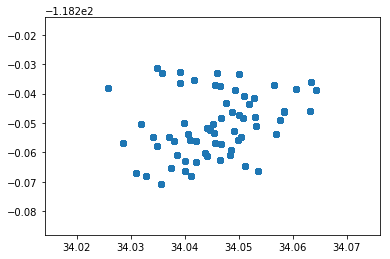

In [19]:
plt.scatter(df.loc[df['Starting Station Longitude']>-118.35]['Starting Station Latitude'],df.loc[df['Starting Station Longitude']>-118.35]['Starting Station Longitude'],alpha=0.3)

In [141]:
import folium
map_stations=folium.Map([df['Starting Station Latitude'].values[0],df['Starting Station Longitude'].values[0]])
map_stations
for i in range(50):

    marker=folium.Marker([df['Starting Station Latitude'].values[i],df['Starting Station Longitude'].values[i]])
    marker.add_to(map_stations)

marker= folium.Marker([38.99,-118.472832])
map_stations

In [54]:
len(df['Starting Station Latitude'].unique())

124

In [117]:
df.loc[df['Starting Station ID']==4108]['Starting Station Longitude'].value_counts()

-118.238243    21
Name: Starting Station Longitude, dtype: int64

In [110]:
len(df.loc[df.Duration==1440])

162

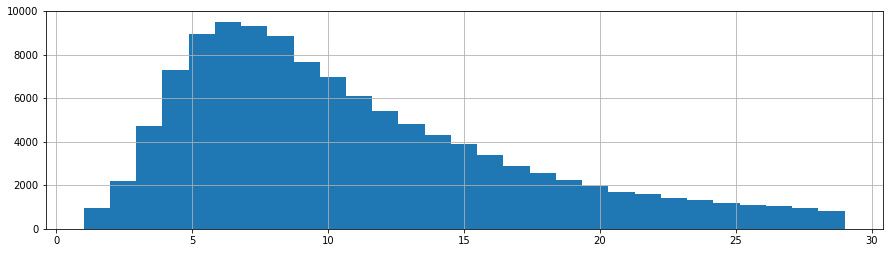

In [114]:
plt.figure(figsize=(15,4))
df.loc[df.Duration<30]['Duration'].hist(bins=29)
# plt.ylim(0,30000)
# plt.xlim(0,5000)

Notes:
create distance ridden metric (drop return trips? only 10%)
corellate distance/duration
insert weeekend/weekday
bin start time? morning/afternoon/evening?
clustering of stations?


machine learning:
ride duration classifier?
pickups from station per day/time period?
